#  Testing Overlap Algorithms
This notebook will test our swap test and BBA implementation that computes the overlap Tr$(\rho\sigma)$

In [1]:
from sys import path
path.insert(0, '..')

from swap import *
from bba import *
from utilities import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Consider two wavefunctions

$$\begin{align*}
|\psi> &= \frac{1}{\sqrt{2}}\left( |0> +             |1>\right) \\
|\phi> &= \frac{1}{\sqrt{2}}\left( |0> + e^{i\alpha} |1>\right)
\end{align*}
$$

To perform the overlap via the swap test, we'll first have to construct the quantum circuits representing these wavefunctions:

In [2]:
alpha = np.pi/4

#quantum circuit
psi = psi_qc(0)
phi = psi_qc(alpha)

#classical representation
psi_c = psi_classical(0)
phi_c = psi_classical(alpha)

The circuit for $|\phi>$ is drawn below:

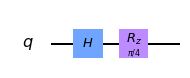

In [3]:
phi.draw(output='mpl')

Now, let's look at the swap test quantum circuit with these wavefuntions:

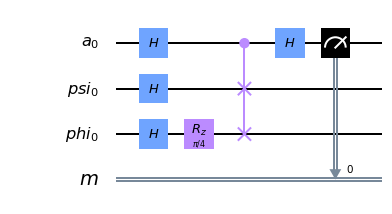

In [4]:
#constructing the swap circuit
qc_swap = swap_test_QC(psi, phi)
qc_swap.draw(output='mpl')

and below is the BBA quantum circuit with these same wavefunctions:

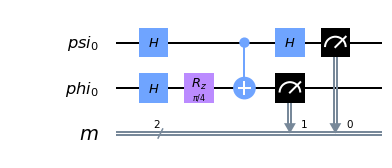

In [5]:
#constructing the bba circuit
qc_swap = bba_QC(psi, phi)
qc_swap.draw(output='mpl')

Now we run the simulation and obtain the overlap. Then we compare to the exact results:

In [6]:
overlap_sw = swap_overlap(psi, phi, shots=10000, noise=True)
overlap_bb =  bba_overlap(psi, phi, shots=10000, noise=True)
overlap_cl = classical_overlap(psi_c, phi_c)

In [7]:
print("swap test overlap: {}".format(overlap_sw))
print("      bba overlap: {}".format(overlap_bb))
print("    exact overlap: {}".format(overlap_cl))
print("")
print("  swap test error: {}".format(np.abs(overlap_sw-overlap_cl)))
print("        bba error: {}".format(np.abs(overlap_bb-overlap_cl)))

swap test overlap: 0.18420000000000003
      bba overlap: 0.7545999999999998
    exact overlap: 0.8535533905932735

  swap test error: 0.6693533905932735
        bba error: 0.09895339059327368


Now let's look at how these overlaps compare as we tune $\alpha$

In [12]:
N = 100
alpha_list = np.linspace(0, 2*np.pi, N)
o_sw_list = np.zeros(N)
o_bb_list = np.zeros(N)
o_cl_list = np.zeros(N)
swap_err_list = np.zeros(N)
bba_err_list = np.zeros(N)


psi = psi_qc(0)
psi_c = psi_classical(0)

for i, alpha in enumerate(alpha_list):
    phi = psi_qc(alpha)
    phi_c = psi_classical(alpha)
    o_sw_list[i] = swap_overlap(psi, phi, shots=1000, noise=True)
    o_bb_list[i] =  bba_overlap(psi, phi, shots=1000, noise=True)
    o_cl_list[i] = classical_overlap(psi_c, phi_c)
    swap_err_list[i] = np.abs(o_sw_list[i] - o_cl_list[i])   
    bba_err_list[i] = np.abs(o_bb_list[i] - o_cl_list[i])   


<IPython.core.display.Javascript object>


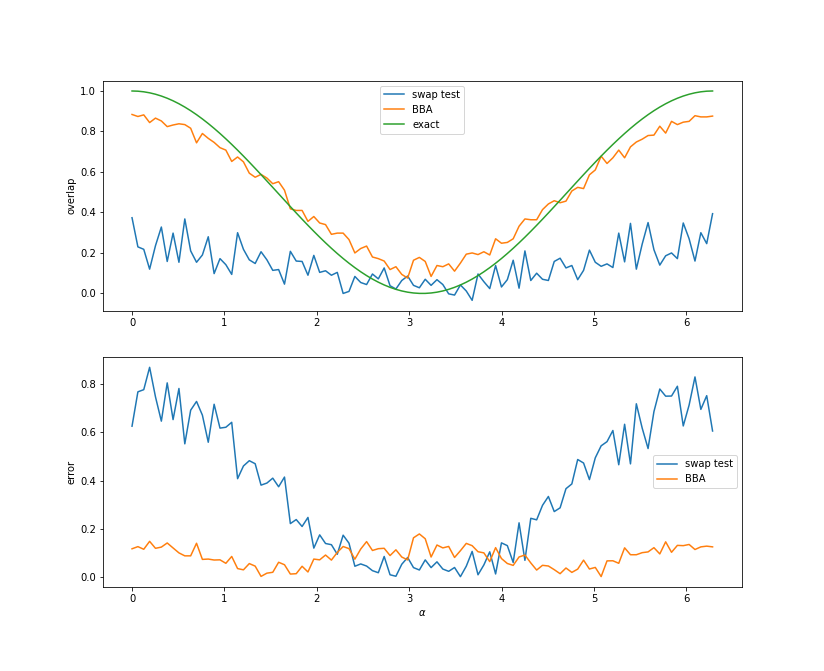

In [13]:
%matplotlib notebook

plt.subplot(211)
plt.plot(alpha_list, o_sw_list, label="swap test")
plt.plot(alpha_list, o_bb_list, label="BBA")
plt.plot(alpha_list, o_cl_list, label="exact")

plt.legend(loc='best')
plt.ylabel("overlap")
plt.subplot(212)
plt.plot(alpha_list, swap_err_list, label="swap test")
plt.plot(alpha_list, bba_err_list, label="BBA")
plt.xlabel(r"$\alpha$")
plt.ylabel("error")
plt.legend(loc='best')
plt.show()